In [1]:
import numpy as np
from lib.envs.blackjack import BlackjackEnv
from lib import plotting
import sys
from collections import defaultdict
import matplotlib

matplotlib.style.use('ggplot')

In [2]:
env = BlackjackEnv()


In [3]:
def create_random_policy(nA):
    A = np.ones(nA, dtype=float) / nA
    def policy_fn(observation):
        return A
    return policy_fn


In [4]:
def create_greedy_policy(Q):
    def policy_fn(state):
        A = np.zeros_like(Q[state], dtype=float)
        best_action = np.argmax(Q[state])
        A[best_action] = 1.0
        return A
    return policy_fn

In [9]:
def mc_control_importance_sampling(env, num_episodes, behavior_policy, discount_factor=1.0):
    Q = defaultdict(lambda: np.zeros(env.action_space.n))
    C = defaultdict(lambda: np.zeros(env.action_space.n))
    
    target_policy = create_greedy_policy(Q)
    
    for i in range(1, num_episodes + 1):
        if i % 1000 == 0:
            print(f"\r {i}/{num_episodes}回合.", end="")
            sys.stdout.flush()
        
        episode = []
        state = env.reset()
        
        for t in range(100):
            probs = behavior_policy(state)
            action = np.random.choice(np.arange(len(probs)), p = probs)
            next_state, reward, done, _ = env.step(action)
            episode.append((state, action, reward))
            if done:
                break
            state = next_state
        G = 0.0
        W = 1.
        for t in range(len(episode))[::-1]:
            state, action, reward = episode[t]
            G = discount_factor * G + reward
            C[state][action] += W
            Q[state][action] += (W / C[state][action]) * (G - Q[state][action])
            if action !=  np.argmax(target_policy(state)):
                break
            W = W * 1 / behavior_policy(state)[action]
    return Q, target_policy

In [10]:
random_policy = create_random_policy(env.action_space.n)
Q, policy = mc_control_importance_sampling(env, num_episodes=500000, 
                                       behavior_policy=random_policy)

 500000/500000回合.

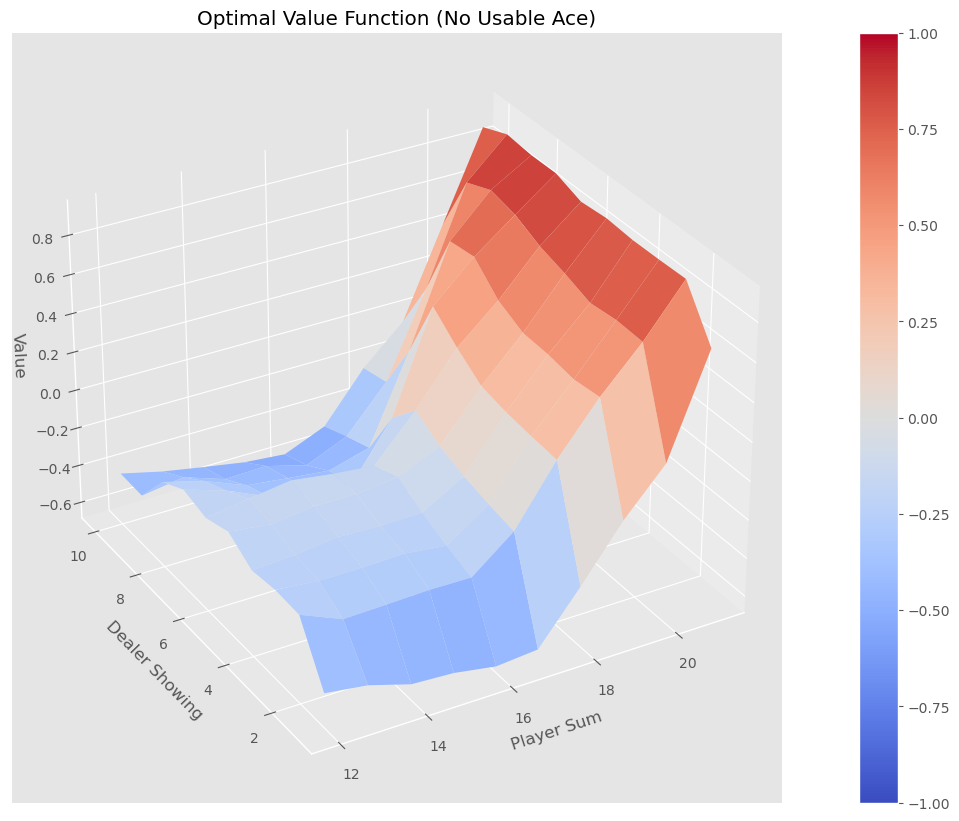

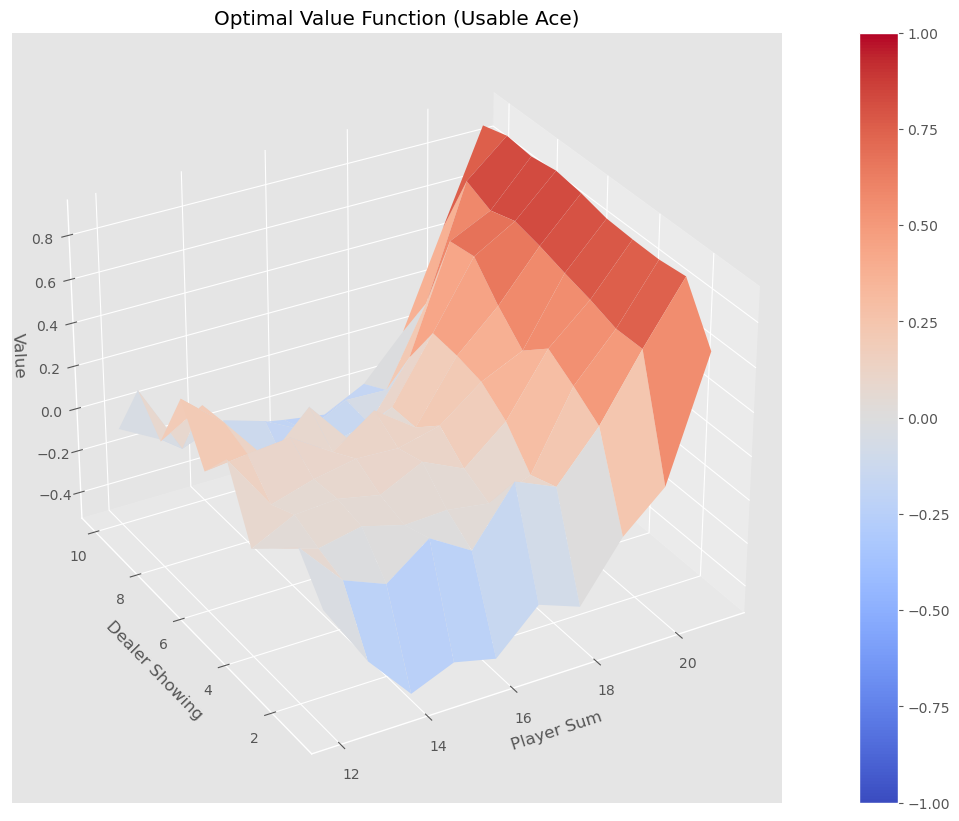

In [11]:
V = defaultdict(float)
for state, actions in Q.items():
    action_value = np.max(actions)
    V[state] = action_value
plotting.plot_value_function(V, title="Optimal Value Function")

In [16]:
x = [1]
if x:
    print(x)

[1]


In [19]:
k = 5
d = k
d = d - 1
print(d)

4
